In [1]:
import numpy as np
import pandas as pd

In [2]:
from functions import*

# Our Data

In [3]:
df = pd.read_csv("./OC_csv//cleaning.csv")
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,12/04/1999,1,"£729,000",apartment
1,Ashford,05/08/2017,unknown,"£699,000",semi-detached
2,Stratford-on-Avon,29/03/2012,3,NaN,detached
3,Canterbury,01/07/2009,2,"£529,000",teraced
4,Camden,16/12/2001,1,"£616,000",apartment
5,Rugby,01/03/2003,-,"£247,000",detached
6,Hampstead,05/03/2016,2,£0,terraced
7,Clapham,05/07/2001,363,"£543,000",apartment
8,Stratford-on-Avon,10th May 2010,3,"£420,000",detached
9,Camden,16/12/2001,1,"£616,000",apartment


# Examine our data

In [4]:
df.dtypes

location              object
date_of_sale          object
number_of_bedrooms    object
price                 object
type                  object
dtype: object

In [5]:
df.isnull().mean()

location              0.0
date_of_sale          0.0
number_of_bedrooms    0.0
price                 0.1
type                  0.0
dtype: float64

# Part I: Processing the main features

# Process location

fine

# Process date_of_sale

In [6]:
df["date_of_sale"] = pd.to_datetime(df["date_of_sale"], dayfirst=True, format="mixed")
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1,"£729,000",apartment
1,Ashford,2017-08-05,unknown,"£699,000",semi-detached
2,Stratford-on-Avon,2012-03-29,3,NaN,detached
3,Canterbury,2009-07-01,2,"£529,000",teraced
4,Camden,2001-12-16,1,"£616,000",apartment
5,Rugby,2003-03-01,-,"£247,000",detached
6,Hampstead,2016-03-05,2,£0,terraced
7,Clapham,2001-07-05,363,"£543,000",apartment
8,Stratford-on-Avon,2010-05-10,3,"£420,000",detached
9,Camden,2001-12-16,1,"£616,000",apartment


In [7]:
df.dtypes

location                      object
date_of_sale          datetime64[ns]
number_of_bedrooms            object
price                         object
type                          object
dtype: object

In [8]:
non_nums = df[~df["number_of_bedrooms"].str.isnumeric()]["number_of_bedrooms"].unique()
df["number_of_bedrooms"] = df["number_of_bedrooms"].replace(non_nums, np.nan)

In [9]:
df["number_of_bedrooms"] = pd.to_numeric(df["number_of_bedrooms"])

In [10]:
df.dtypes

location                      object
date_of_sale          datetime64[ns]
number_of_bedrooms           float64
price                         object
type                          object
dtype: object

In [11]:
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,"£729,000",apartment
1,Ashford,2017-08-05,NaN,"£699,000",semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,"£529,000",teraced
4,Camden,2001-12-16,1.0,"£616,000",apartment
5,Rugby,2003-03-01,NaN,"£247,000",detached
6,Hampstead,2016-03-05,2.0,£0,terraced
7,Clapham,2001-07-05,363.0,"£543,000",apartment
8,Stratford-on-Avon,2010-05-10,3.0,"£420,000",detached
9,Camden,2001-12-16,1.0,"£616,000",apartment


# Process price

In [12]:
df["price"] = df["price"].apply(lambda x: x.replace("£","") if type(x) is str else x)
df["price"] = df["price"].apply(lambda x: x.replace(",","") if type(x) is str else x)

In [13]:
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000,apartment
1,Ashford,2017-08-05,NaN,699000,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,529000,teraced
4,Camden,2001-12-16,1.0,616000,apartment
5,Rugby,2003-03-01,NaN,247000,detached
6,Hampstead,2016-03-05,2.0,0,terraced
7,Clapham,2001-07-05,363.0,543000,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000,detached
9,Camden,2001-12-16,1.0,616000,apartment


In [14]:
df["price"] = pd.to_numeric(df["price"])
df.dtypes

location                      object
date_of_sale          datetime64[ns]
number_of_bedrooms           float64
price                        float64
type                          object
dtype: object

In [15]:
df["price"] = df["price"].replace([0], np.nan)

In [16]:
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000.0,apartment
1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,529000.0,teraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-03-01,NaN,247000.0,detached
6,Hampstead,2016-03-05,2.0,NaN,terraced
7,Clapham,2001-07-05,363.0,543000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


# Process type

In [17]:
df["type"].unique()

array(['apartment', 'semi-detached', 'detached', 'teraced', 'terraced'],
      dtype=object)

In [18]:
df["type"] = df["type"].replace(["teraced"],"terraced")
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000.0,apartment
1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-03-01,NaN,247000.0,detached
6,Hampstead,2016-03-05,2.0,NaN,terraced
7,Clapham,2001-07-05,363.0,543000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


# Part II: Processing Outliers and Duplicates

In [19]:
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000.0,apartment
1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-03-01,NaN,247000.0,detached
6,Hampstead,2016-03-05,2.0,NaN,terraced
7,Clapham,2001-07-05,363.0,543000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


In [20]:
find_outliers(df.price)

(array([5]),)

In [21]:
find_outliers(df.number_of_bedrooms)

(array([7]),)

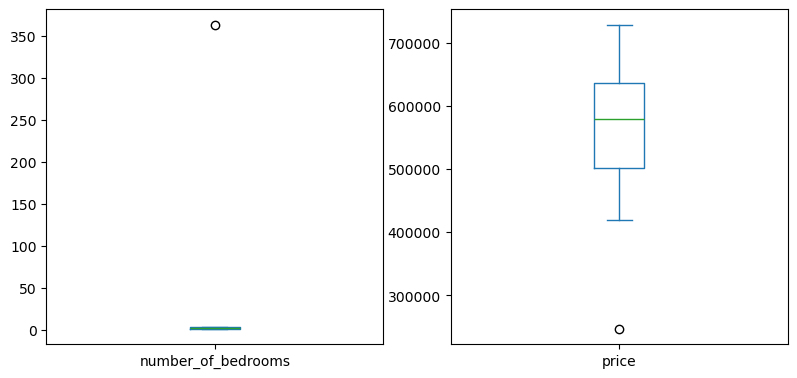

In [22]:
boxPlotAll(df[["number_of_bedrooms", "price"]])

In [23]:
df.drop(7, inplace=True)
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000.0,apartment
1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-03-01,NaN,247000.0,detached
6,Hampstead,2016-03-05,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


In [24]:
df[df.duplicated()]

,location,date_of_sale,number_of_bedrooms,price,type
9,Camden,2001-12-16,1.0,616000.0,apartment


In [25]:
df = df.drop_duplicates()

In [26]:
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000.0,apartment
1,Ashford,2017-08-05,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-03-01,NaN,247000.0,detached
6,Hampstead,2016-03-05,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached


# Part III: Processing nulls

In [27]:
df = df.dropna(axis=0)
df

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-04-12,1.0,729000.0,apartment
3,Canterbury,2009-07-01,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
